Firstly, I try to do an algorithm solving for a 2d space with only one solution (1 peak).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm   # colormap
from matplotlib.ticker import LinearLocator     # for having ticks evenly spaced on the axis

In [2]:
# start by creating a 10x10 grid
N = 100

x = np.linspace(0,10,N)
y = np.linspace(0,10,N)
x,y = np.meshgrid(x,y)


def f(x,y):
    
    return np.exp(-0.1*(x-5)**2-0.1*(y-5)**2)  # questo circa è un solo picco, però è meglio farlo con una gaussiana



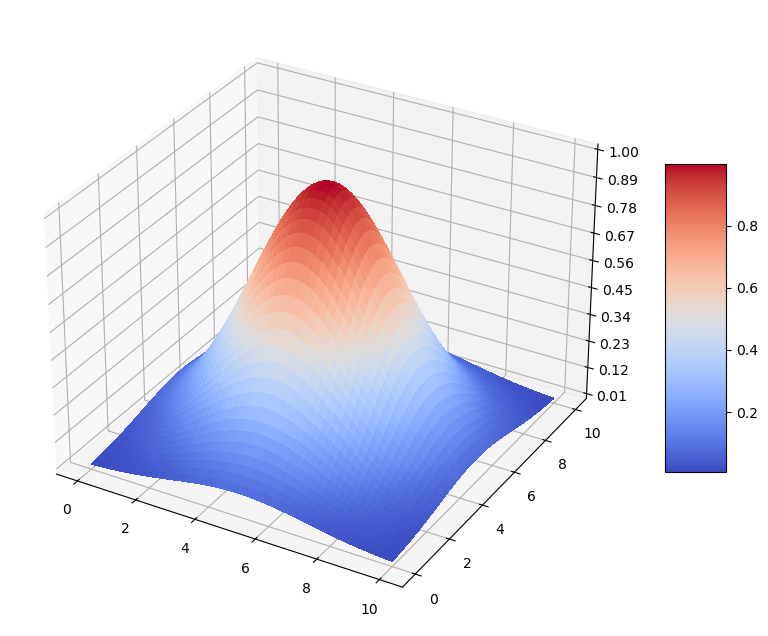

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8))
surf = ax.plot_surface(x, y, f(x,y), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()